In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data
#df = pd.read_csv('../data/cleaned_311.csv')
df = pd.read_csv('../../data/311_cleaned_v2.csv')

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_104128\215079703.py:8: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/311_cleaned_v2.csv')


In [27]:
df.head()

,case_enquiry_id,open_dt,closed_dt,on_time,case_status,closure_reason,subject,reason,type,queue,department,fire_district,pwd_district,city_council_district,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_zipcode,latitude,longitude,source,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter
0,101000295613,2011-06-30 21:32:33,2011-07-01 01:06:58,ONTIME,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,8,07,3,B3,Greater Mattapan,7,Ward 17,1714,2126,42.27,-71.08,Employee Generated,0.15,2011,6,30,21,32,3,181,2
1,101000295614,2011-06-30 22:18:31,2011-07-01 02:12:43,ONTIME,Closed,closed,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,12,06,5,E5,Roslindale,10,Ward 20,2008,2131,42.28,-71.14,Self Service,0.16,2011,6,30,22,18,3,181,2
2,101000295615,2011-06-30 22:28:04,2011-08-01 11:21:46,ONTIME,Closed,resolved,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,-1,06,6,E5,West Roxbury,12,Ward 20,2017,2132,42.30,-71.17,Self Service,31.54,2011,6,30,22,28,3,181,2
3,101000295616,2011-06-30 23:03:48,2011-07-22 12:13:45,OVERDUE,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,12,08,5,E18,Hyde Park,10,Ward 18,1816,2136,42.25,-71.12,Self Service,21.55,2011,6,30,23,3,3,181,2
4,101000295617,2011-06-30 23:12:31,2011-07-01 02:12:38,ONTIME,Closed,resolved,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,7,03,3,C11,Dorchester,7,Ward 13,1309,2125,42.31,-71.06,Constituent Call,0.13,2011,6,30,23,12,3,181,2


In [28]:
df.isnull().sum()

case_enquiry_id                        0
open_dt                                0
closed_dt                         195432
on_time                                0
case_status                            0
closure_reason                         0
subject                                0
reason                                 0
type                                   0
queue                                  0
department                             0
fire_district                          0
pwd_district                           0
city_council_district                  0
police_district                        0
neighborhood                           0
neighborhood_services_district         0
ward                                   0
precinct                               0
location_zipcode                       0
latitude                           44020
longitude                          44020
source                                 0
resolution_time                   195432
open_year       

In [29]:
# drop na
df.dropna(inplace=True)
df.isnull().sum()

case_enquiry_id                   0
open_dt                           0
closed_dt                         0
on_time                           0
case_status                       0
closure_reason                    0
subject                           0
reason                            0
type                              0
queue                             0
department                        0
fire_district                     0
pwd_district                      0
city_council_district             0
police_district                   0
neighborhood                      0
neighborhood_services_district    0
ward                              0
precinct                          0
location_zipcode                  0
latitude                          0
longitude                         0
source                            0
resolution_time                   0
open_year                         0
open_month                        0
open_day                          0
open_hour                   

In [30]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# Resolution Time Exploration

In [31]:
df.resolution_time.describe()

count   2484497.00
mean         31.28
std         159.18
min           0.00
25%           0.06
50%           0.75
75%           5.71
max        4417.96
Name: resolution_time, dtype: float64

<Figure size 1200x800 with 0 Axes>

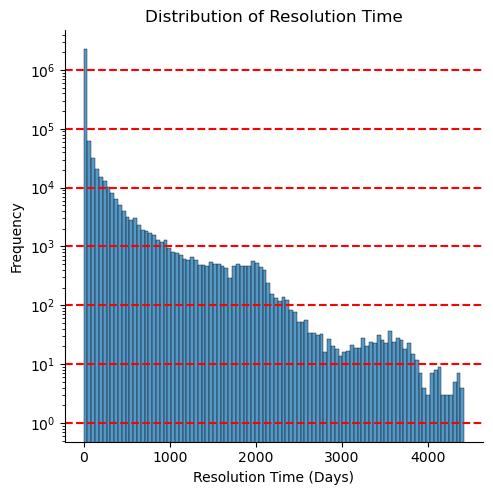

In [32]:
# Plot distribution of resolution time
plt.figure(figsize=(12,8))
sns.displot(df.resolution_time, bins=100)
plt.title('Distribution of Resolution Time')
plt.xlabel('Resolution Time (Days)')
plt.ylabel('Frequency')
# log scale on x-axis and y-axis
plt.yscale('log')
# Y scale max value will be upper bounded by the max value in the data
y_max = df.shape[0]
# GET log 10 of y_max
y_max_log = np.log10(y_max)
# round up to nearest integer
y_max_log = np.ceil(y_max_log)
for i in range(int(y_max_log)):
    # plot horizontal lines at each power of 10
    plt.axhline(y=10**i, color='r', linestyle='--')
plt.show()

Seems that around 50% of time issues are resolved within a day.

In [39]:
df['longitude_rounded'] = df.longitude.round(0)
df['latitude_rounded'] = df.latitude.round(0)

# Drop rows with latitude rounded to 0
df = df[df.latitude_rounded != 0]

# Drop rows with longitude rounded to 0
df = df[df.longitude_rounded != 0]

df.shape

(2484489, 34)

<Figure size 1000x1000 with 0 Axes>

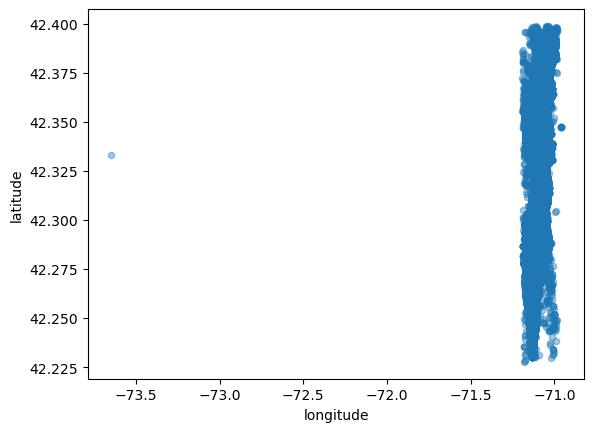

In [40]:
# plot a map of the latitudes and longitudes
plt.figure(figsize=(10,10))
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

In [ ]:
# Drop the one request with a longitude less that -73
df = df[df.longitude > -73]

<Figure size 1000x1000 with 0 Axes>

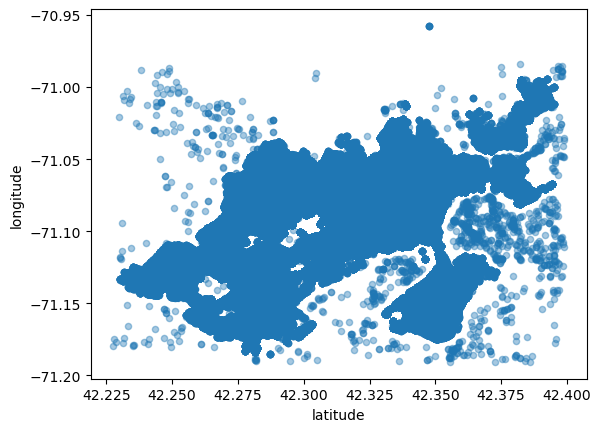

In [42]:
# replot
plt.figure(figsize=(10,10))
df.plot(kind="scatter", x="latitude", y="longitude", alpha=0.4)
plt.show()

In [51]:
# Calculate the average longitude and latitude for downtown
mean_boston_longitude = df[df['neighborhood'] == 'Boston'].longitude.mean()
mean_boston_latitude = df[df['neighborhood'] == 'Boston'].latitude.mean()

import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Add new feature defining distance from Boston
df['distance_from_boston'] = df.apply(lambda row: haversine(mean_boston_latitude, mean_boston_longitude, row['latitude'], row['longitude']), axis=1)

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_104128\1358419866.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_from_boston'] = df.apply(lambda row: haversine(mean_boston_latitude, mean_boston_longitude, row['latitude'], row['longitude']), axis=1)


In [53]:
df['distance_from_boston'].describe()

count   2484488.00
mean          4.82
std           3.15
min           0.06
25%           2.16
50%           4.17
75%           6.93
max          16.61
Name: distance_from_boston, dtype: float64

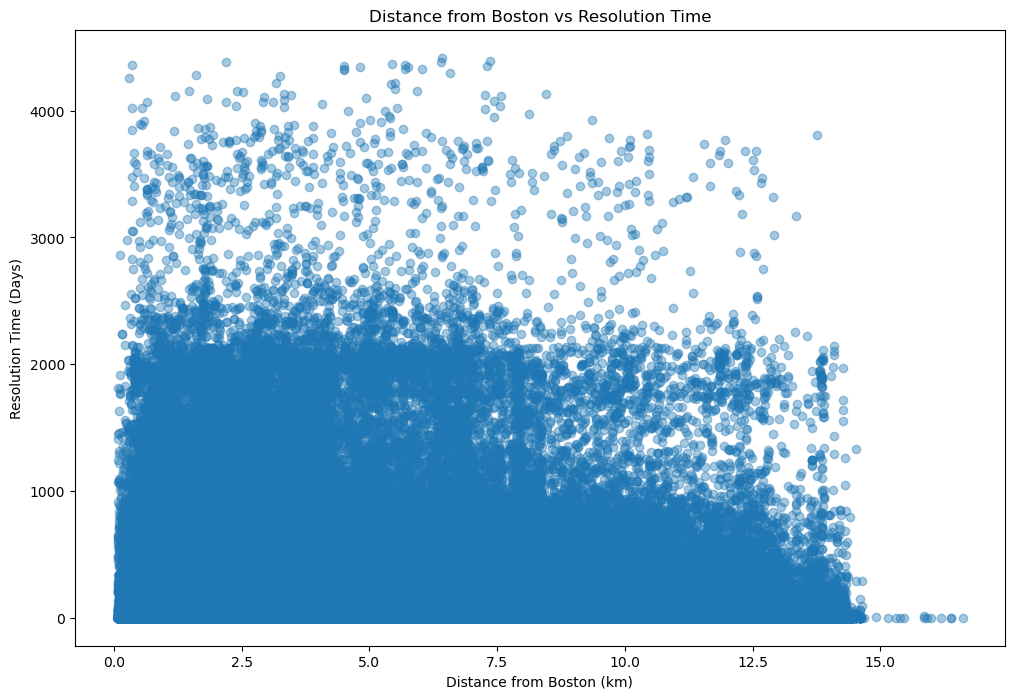

In [54]:
# Scatter plot of distance from Boston vs resolution time
plt.figure(figsize=(12,8))
plt.scatter(df.distance_from_boston, df.resolution_time, alpha=0.4)
plt.title('Distance from Boston vs Resolution Time')
plt.xlabel('Distance from Boston (km)')
plt.ylabel('Resolution Time (Days)')
plt.show()

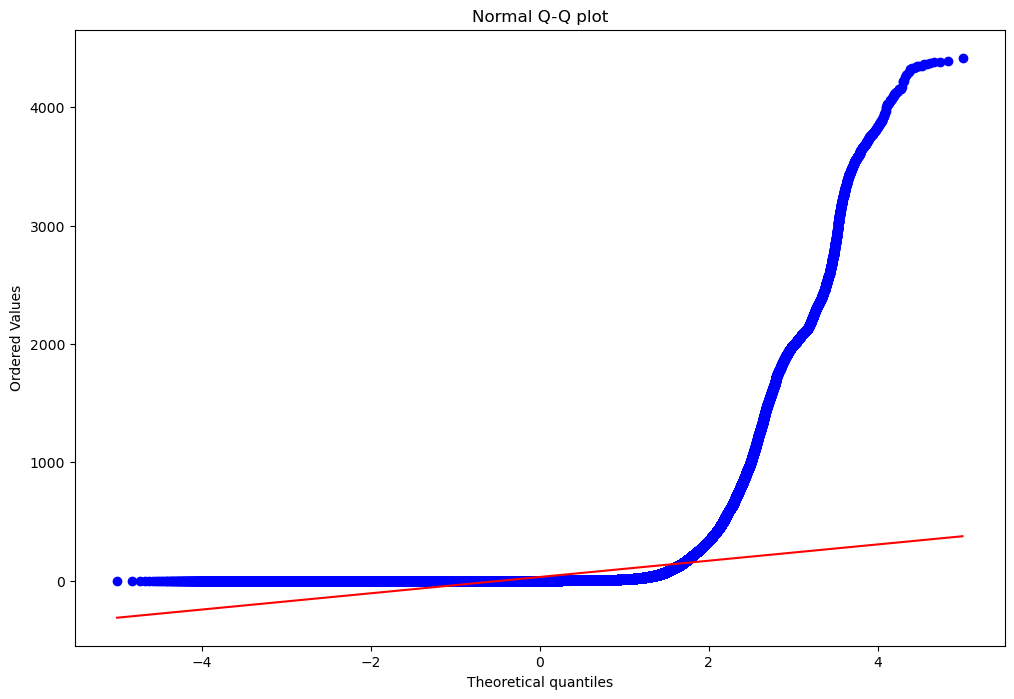

In [58]:
import scipy.stats as stats

# Q-Q plot of distance from Boston
plt.figure(figsize=(12,8))
stats.probplot(df.resolution_time, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()


In [61]:
# log transform resolution time
df['log_resolution_time'] = np.log(df.resolution_time + 0.0000001)


C:\Users\kmfoc\AppData\Local\Temp\ipykernel_104128\3175640453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_resolution_time'] = np.log(df.resolution_time + 0.0000001)


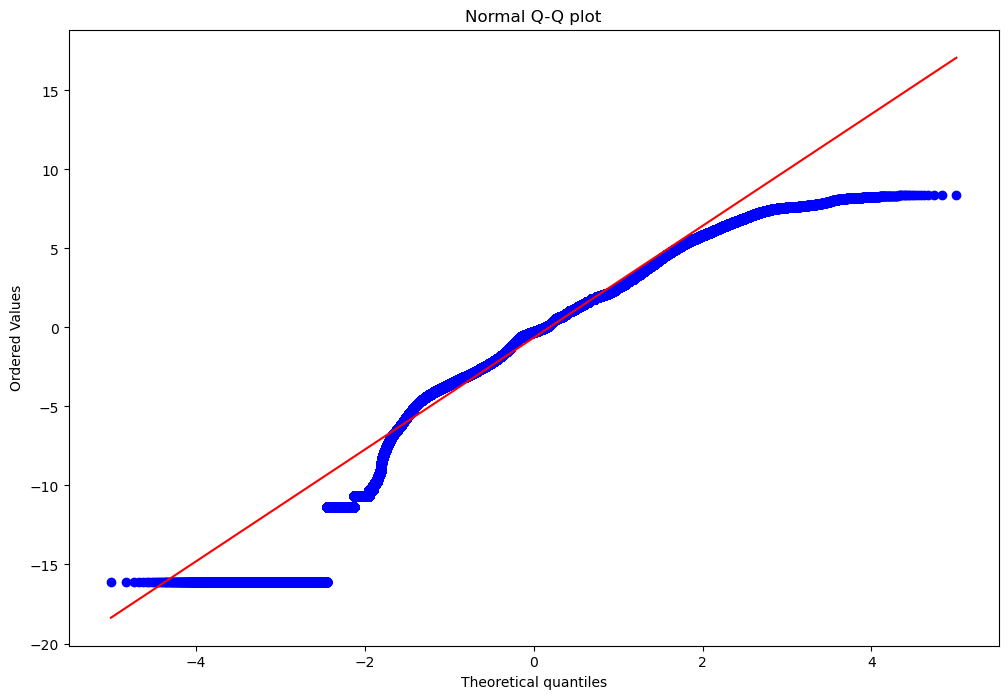

In [62]:
# Q-Q plot of log transformed resolution time
plt.figure(figsize=(12,8))
stats.probplot(df.log_resolution_time, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()